In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!pip install split-folders





  Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [5]:
import splitfolders

input_folders = 'TeaDieseases'
output_folders = 'dataset'
ratios = (0.7,0.1,0.2)

splitfolders.ratio(input_folders, output = output_folders, seed=42, ratio=ratios, group_prefix=None)

Copying files: 2267 files [00:20, 110.04 files/s]


In [7]:
IMAGE_SIZE = 512
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
    
)

Found 1574 images belonging to 6 classes.


In [8]:
for image_batch , label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.44619367 0.4614433  0.35381445]
  [0.43621573 0.451902   0.34601963]
  [0.4559139  0.4716002  0.36571783]
  ...
  [0.17124322 0.21438047 0.08889027]
  [0.17167781 0.21481507 0.08932487]
  [0.1721124  0.21524966 0.08975946]]

 [[0.44923583 0.4640509  0.35468364]
  [0.43708488 0.4527712  0.3468888 ]
  [0.45330638 0.46899265 0.36311027]
  ...
  [0.16995743 0.21309468 0.08760449]
  [0.16952284 0.21266009 0.08716989]
  [0.16908824 0.2122255  0.0867353 ]]

 [[0.452278   0.46665844 0.35555282]
  [0.43795407 0.45364034 0.347758  ]
  [0.4506988  0.46638507 0.36050272]
  ...
  [0.14808792 0.19122517 0.06573497]
  [0.14461116 0.18774842 0.06225822]
  [0.14113441 0.18427166 0.05878147]]

 ...

 [[0.47176847 0.39430696 0.30115917]
  [0.4552539  0.3786616  0.286383  ]
  [0.43873933 0.36301622 0.27160683]
  ...
  [0.6292276  0.52455854 0.42787343]
  [0.63894236 0.52913845 0.43502077]
  [0.61959547 0.5058741  0.4156739 ]]

 [[0.33656865 0.26551965 0.18154904]
  [0.33222273 0.26073912 0.17894147]


In [9]:

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
    
)

Found 222 images belonging to 6 classes.


In [10]:

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
    
)

Found 458 images belonging to 6 classes.


In [12]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 6

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),  activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax')
    
    
])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 126, 126, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 62, 62, 64)        0

In [14]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [15]:
1574/32

49.1875

In [16]:
222/32

6.9375

In [17]:
model.fit(
    train_generator,
    steps_per_epoch = 49,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps = 6,
    verbose = 1,
    epochs = 20
)

Epoch 1/20


49/49 [==============================] - 424s 9s/step - loss: 1.4216 - accuracy: 0.4125 - val_loss: 1.1147 - val_accuracy: 0.4531
Epoch 2/20
49/49 [==============================] - 520s 11s/step - loss: 0.8042 - accuracy: 0.6894 - val_loss: 0.5916 - val_accuracy: 0.7812
Epoch 3/20
49/49 [==============================] - 500s 10s/step - loss: 0.3793 - accuracy: 0.8567 - val_loss: 0.3315 - val_accuracy: 0.8802
Epoch 4/20
49/49 [==============================] - 537s 11s/step - loss: 0.1902 - accuracy: 0.9300 - val_loss: 0.2215 - val_accuracy: 0.9323
Epoch 5/20
49/49 [==============================] - 516s 11s/step - loss: 0.1660 - accuracy: 0.9429 - val_loss: 0.2402 - val_accuracy: 0.9323
Epoch 6/20
49/49 [==============================] - 507s 10s/step - loss: 0.0902 - accuracy: 0.9676 - val_loss: 0.1846 - val_accuracy: 0.9740
Epoch 7/20
49/49 [==============================] - 496s 10s/step - loss: 0.5102 - accuracy: 0.8489 - val_loss: 0.4051 - val_accuracy: 0.8802
Epoch

In [18]:
scores = model.evaluate(test_generator)

15/15 [==============================] - 61s 4s/step - loss: 0.1082 - accuracy: 0.9803


In [19]:
scores

[0.10817649960517883, 0.9803493618965149]

# Run prediction on sample image

In [30]:
class_names = list(test_generator.class_indices.keys())
class_names

['Black-blight',
 'Blister-blight',
 'Canker',
 'Horse-hair-blight',
 'brown blight',
 'healthy']

First image to predict
Acutal label: Black-blight
1/1 [==============================] - 0s 387ms/step
Predicted label: Black-blight


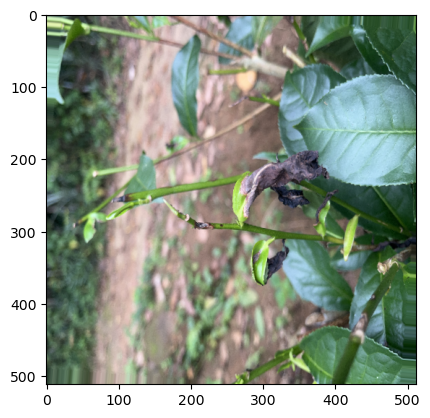

In [34]:
import numpy as np
for image_batch,labels_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print('First image to predict')
    plt.imshow(first_image)
    print('Acutal label:',class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

# Write a function for inference

In [35]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0) #Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [1]:
# Now run inference on few sample images

plt.figure(figsize = (15,15))
for images, labels in test_generator:
    for i in  range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class = confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%" )
        
        plt.axis('off')
    break

NameError: name 'plt' is not defined

# Saving the Model

In [42]:
# Saving the model in h5 format
model.save("../teadiseases.h5")

C:\Users\Manul Perera\Documents\Anaconda\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
!pip install tensorFlow

Unable to create process using 'C:\Users\Manul Perera\Documents\Anaconda\python.exe "C:\Users\Manul Perera\Documents\Anaconda\Scripts\pip-script.py" install tensorFlow'


ModuleNotFoundError: No module named 'tensorFlow'